In [381]:
import pandas as pd

In [382]:
df=pd.read_csv('heart_failure_clinical_records_dataset.csv')
X = df.iloc[:, 0:-1].values
y = df.iloc[:, -1].values

In [383]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [384]:
df.shape

(299, 13)

In [385]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [386]:
death_cases = df[df['DEATH_EVENT'] == 1]
print(death_cases)

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
220  73.0        0                       582         0                 20   
230  60.0        0                       166         0                 30   
246  55.0        0                      2017         0                 25   
262  65.0        1                       258         1                 25   
266  55.0        0                      1199         0                 20   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \

In [387]:
column_names_for_X = df.columns[0:-1].tolist()
print("The column names for X are:")
print(column_names_for_X)

The column names for X are:
['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']


In [388]:
column_names_for_y = df.columns[[-1]].tolist()
print("The column names for y are:")
print(column_names_for_y)

The column names for y are:
['DEATH_EVENT']


## Splitting the dataset into the Training set and Test set

In [389]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [390]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [391]:
#Applying SMOTE

# Import the library
from imblearn.over_sampling import SMOTE
from collections import Counter# Check counts BEFORE SMOTE

print("Before SMOTE:", Counter(y_train))
# Output might look like: {0: 160, 1: 70} (Imbalanced)

# Initialize and Fit SMOTE
# sampling_strategy='auto' means it resamples to 50/50 ratio
smote = SMOTE(random_state=42)

# Fit only on Training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 4. Check counts AFTER SMOTE
print("After SMOTE:", Counter(y_train_smote))
# Output should be: {0: 160, 1: 160} (Perfectly Balanced)#

Before SMOTE: Counter({0: 166, 1: 73})
After SMOTE: Counter({0: 166, 1: 166})


## Training the Logistic Regression model on the Training set

In [412]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state = 0)
classifier_lr.fit(X_train_smote, y_train_smote)

LogisticRegression(random_state=0)

In [413]:
y_pred_lr = classifier_lr.predict(X_test)

In [414]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
#Confusion Matrix
print("Confusion Matrix for Logistic Regression:")
cm = confusion_matrix(y_test, y_pred_lr)
print(cm)
# Accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("\nAccuracy (Logistic Regression):", accuracy_lr)
#Recall
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')
print("\nRecall (Logistic Regression):", recall_lr)
#Precision
precision_lr = precision_score(y_test, y_pred_lr, average='weighted')
print("\nPrecision (Logistic Regression):",precision_lr)
#F1 Score
f1_lr = f1_score(y_test,y_pred_lr, average='weighted')
print("\nF1 Score (Logistic Regression):",f1_lr)
#Classification Report
report_lr = classification_report(y_test, y_pred_lr)
print("\nClassification Report(Logistic Regression):\n",report_lr)

Confusion Matrix for Logistic Regression:
[[33  4]
 [10 13]]

Accuracy (Logistic Regression): 0.7666666666666667

Recall (Logistic Regression): 0.7666666666666667

Precision (Logistic Regression): 0.7663930688554491

F1 Score (Logistic Regression): 0.7579166666666667

Classification Report(Logistic Regression):
               precision    recall  f1-score   support

           0       0.77      0.89      0.82        37
           1       0.76      0.57      0.65        23

    accuracy                           0.77        60
   macro avg       0.77      0.73      0.74        60
weighted avg       0.77      0.77      0.76        60



In [521]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_lr, X = X_train_smote, y = y_train_smote, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 83.44 %
Standard Deviation: 4.33 %


## Training the KNN model on the Training set

In [432]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_knn.fit(X_train_smote, y_train_smote)

KNeighborsClassifier()

In [433]:
y_pred_knn = classifier_knn.predict(X_test)

In [434]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
#Confusion Matrix
print("Confusion Matrix for KNN:")
cm = confusion_matrix(y_test, y_pred_knn)
print(cm)
# Accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("\nAccuracy (KNN):", accuracy_knn)
#Recall
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
print("\nRecall (KNN):", recall_knn)
#Precision
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
print("\nPrecision (KNN):",precision_knn)
#F1 Score
f1_knn = f1_score(y_test,y_pred_knn, average='weighted')
print("\nF1 Score (KNN):",f1_knn)
#Classification Report
report_knn = classification_report(y_test, y_pred_knn)
print("\nClassification Report(KNN):\n",report_knn)

Confusion Matrix for KNN:
[[27 10]
 [ 9 14]]

Accuracy (KNN): 0.6833333333333333

Recall (KNN): 0.6833333333333333

Precision (KNN): 0.6861111111111112

F1 Score (KNN): 0.684533177887885

Classification Report(KNN):
               precision    recall  f1-score   support

           0       0.75      0.73      0.74        37
           1       0.58      0.61      0.60        23

    accuracy                           0.68        60
   macro avg       0.67      0.67      0.67        60
weighted avg       0.69      0.68      0.68        60



In [520]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_knn, X = X_train_smote, y = y_train_smote, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 81.66 %
Standard Deviation: 5.03 %


## Training the Supper Vector Machine model on the Training set

In [448]:
from sklearn.svm import SVC
classifier_svm = SVC(kernel = 'linear',class_weight='balanced', random_state = 0)
classifier_svm.fit(X_train_smote, y_train_smote)

SVC(class_weight='balanced', kernel='linear', random_state=0)

In [449]:
y_pred_svm = classifier_svm.predict(X_test)

In [450]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
#Confusion Matrix
print("Confusion Matrix for SVM:")
cm = confusion_matrix(y_test, y_pred_svm)
print(cm)
# Accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("\nAccuracy (SVM):", accuracy_svm)
#Recall
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
print("\nRecall (SVM):", recall_svm)
#Precision
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
print("\nPrecision (SVM):",precision_svm)
#F1 Score
f1_svm = f1_score(y_test,y_pred_svm, average='weighted')
print("\nF1 Score (SVM):",f1_svm)
#Classification Report
report_svm = classification_report(y_test, y_pred_svm)
print("\nClassification Report(SVM):\n",report_svm)

Confusion Matrix for SVM:
[[32  5]
 [ 8 15]]

Accuracy (SVM): 0.7833333333333333

Recall (SVM): 0.7833333333333333

Precision (SVM): 0.7808333333333334

F1 Score (SVM): 0.779995973019229

Classification Report(SVM):
               precision    recall  f1-score   support

           0       0.80      0.86      0.83        37
           1       0.75      0.65      0.70        23

    accuracy                           0.78        60
   macro avg       0.78      0.76      0.76        60
weighted avg       0.78      0.78      0.78        60



In [519]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_svm, X = X_train_smote, y = y_train_smote, cv = 3)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 84.04 %
Standard Deviation: 0.82 %


## Training the Random Forest Classifier model on the Training set

In [503]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators = 100,max_depth=5,min_samples_leaf=5, criterion = 'entropy',class_weight='balanced', random_state = 0)
classifier_rf.fit(X_train_smote, y_train_smote)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5, min_samples_leaf=5, random_state=0)

In [504]:
y_pred_rf = classifier_rf.predict(X_test)

In [505]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
#Confusion Matrix
print("Confusion Matrix for Random Forest:")
cm = confusion_matrix(y_test, y_pred_rf)
print(cm)
# Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("\nAccuracy (Random Forest):", accuracy_rf)
#Recall
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
print("\nRecall (Random Forest):", recall_rf)
#Precision
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
print("\nPrecision (Random Forest):",precision_rf)
#F1 Score
f1_rf = f1_score(y_test,y_pred_rf, average='weighted')
print("\nF1 Score (Random Forest):",f1_rf)
#Classification Report
report_rf = classification_report(y_test, y_pred_rf)
print("\nClassification Report(Random Forest):\n",report_rf)

Confusion Matrix for Random Forest:
[[32  5]
 [ 6 17]]

Accuracy (Random Forest): 0.8166666666666667

Recall (Random Forest): 0.8166666666666667

Precision (Random Forest): 0.8155103668261563

F1 Score (Random Forest): 0.8158518518518518

Classification Report(Random Forest):
               precision    recall  f1-score   support

           0       0.84      0.86      0.85        37
           1       0.77      0.74      0.76        23

    accuracy                           0.82        60
   macro avg       0.81      0.80      0.80        60
weighted avg       0.82      0.82      0.82        60



In [518]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_rf, X = X_train_smote, y = y_train_smote, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 86.72 %
Standard Deviation: 7.69 %


## Training the Decision Tree Classifier model on the Training set

In [507]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_dt.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [508]:
y_pred_dt = classifier_dt.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
#Confusion Matrix
print("Confusion Matrix for Decision Tree:")
cm = confusion_matrix(y_test, y_pred_dt)
print(cm)
# Accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("\nAccuracy (Decision Tree):", accuracy_dt)
#Recall
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
print("\nRecall (Decision Tree):", recall_dt)
#Precision
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
print("\nPrecision (Decision Tree):",precision_dt)
#F1 Score
f1_dt = f1_score(y_test,y_pred_dt, average='weighted')
print("\nF1 Score (Decision Tree):",f1_dt)
#Classification Report
report_dt = classification_report(y_test, y_pred_dt)
print("\nClassification Report(Decision Tree):\n",report_dt)

Confusion Matrix for Decision Tree:
[[30  7]
 [ 6 17]]

Accuracy (Decision Tree): 0.7833333333333333

Recall (RDecision Tree): 0.7833333333333333

Precision (Decision Tree): 0.7854166666666667

F1 Score (Decision Tree): 0.7841542796075003

Classification Report(Decision Tree):
               precision    recall  f1-score   support

           0       0.83      0.81      0.82        37
           1       0.71      0.74      0.72        23

    accuracy                           0.78        60
   macro avg       0.77      0.77      0.77        60
weighted avg       0.79      0.78      0.78        60



In [517]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_dt, X = X_train_smote, y = y_train_smote, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 81.91 %
Standard Deviation: 5.64 %


## Training the XG Boost Classifier model on the Training set

In [512]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report


In [ ]:
classifier_xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.05,    # Slow learning for stability
    max_depth=3,           # Shallow trees to prevent overfitting
    subsample=0.8,         # Use random subset of rows
    colsample_bytree=0.8,  # Use random subset of columns
    eval_metric='logloss',
    random_state=0
)


In [ ]:
classifier_xgb.fit(X_train_smote, y_train_smote)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [527]:
y_pred_xgb = classifier_xgb.predict(X_test)

In [528]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
#Confusion Matrix
print("Confusion Matrix for XGB:")
cm = confusion_matrix(y_test, y_pred_xgb)
print(cm)
# Accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("\nAccuracy (XGB):", accuracy_xgb)
#Recall
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')
print("\nRecall (XGB):", recall_xgb)
#Precision
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')
print("\nPrecision (XGB):",precision_xgb)
#F1 Score
f1_xgb = f1_score(y_test,y_pred_xgb, average='weighted')
print("\nF1 Score (XGB):",f1_xgb)
#Classification Report
report_xgb = classification_report(y_test, y_pred_xgb)
print("\nClassification Report(XGB):\n",report_xgb)

Confusion Matrix for XGB:
[[32  5]
 [ 5 18]]

Accuracy (XGB): 0.8333333333333334

Recall (XGB): 0.8333333333333334

Precision (XGB): 0.8333333333333334

F1 Score (XGB): 0.8333333333333334

Classification Report(XGB):
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        37
           1       0.78      0.78      0.78        23

    accuracy                           0.83        60
   macro avg       0.82      0.82      0.82        60
weighted avg       0.83      0.83      0.83        60



In [529]:

accuracies = cross_val_score(estimator=classifier_xgb, X=X_train_smote, y=y_train_smote, cv=10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))


Accuracy: 87.33 %
Standard Deviation: 5.41 %


## Final Model selected is XGBoost Classifier with an Accuracy of 87.33% with a Standard Deviation of 5.41%

## Death Caused
### 0 - NO
### 1 - YES

In [531]:
#example 1
print(classifier_xgb.predict(sc.transform([[62,1,321,0,15,1,25000,3.6,140,1,0,4]])))

[1]


In [537]:
#example 2
print(classifier_xgb.predict(sc.transform([[67,0,482,0,50,0,263000,1.18,37,1,1,76]])))

[0]


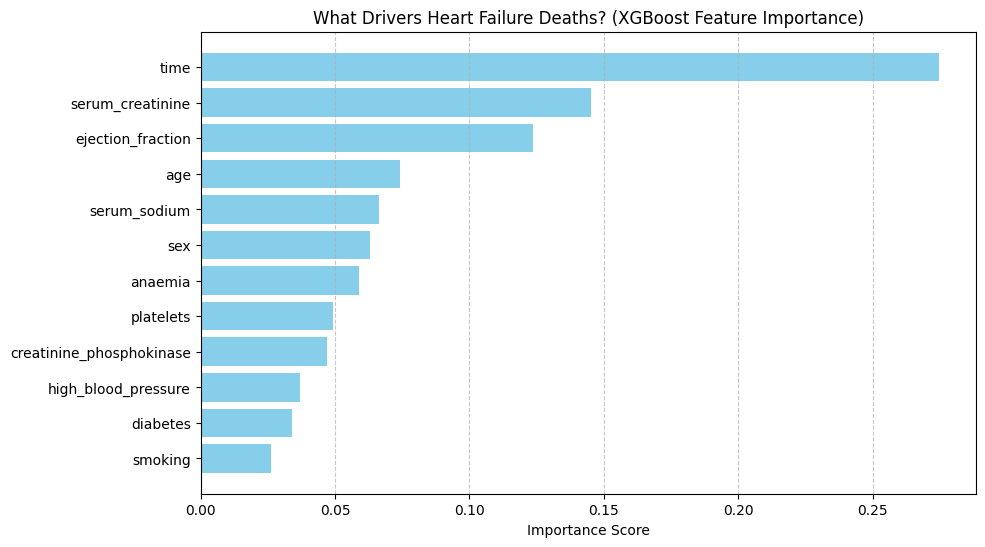

In [538]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Get the feature importances from the trained model
importances = classifier_xgb.feature_importances_

# 2. Get the column names
# Note: If you dropped 'time', make sure your feature_names list matches your X!
# Based on your previous code, you used all columns except the last one:
feature_names = df.columns[0:-1].tolist()

# 3. Create a DataFrame for easy plotting
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# 4. Sort the features (Highest importance on top)
importance_df = importance_df.sort_values(by='Importance', ascending=True)

# 5. Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel("Importance Score")
plt.title("What Drivers Heart Failure Deaths? (XGBoost Feature Importance)")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()